In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Load the Olivetti Faces Dataset

In [2]:
# Load data
dataset = datasets.fetch_olivetti_faces()
images = dataset['data']
images.shape

(400, 4096)

# Perform PCA

In [3]:
# Run PCA on the Data


# Generate New Images by Adding Principal Components to Images

In [4]:
# Function to create new images and plot them
def gen_new_image(image_num, eig_vector, degree):
    fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize = (10,100))
    new_im = images[image_num] + eig_vectors[:,-eig_vector]*degree #5 for eye colour, 6 for smile
    ax1.imshow(images[image_num].reshape(64,64), cmap='gray')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel('Original Image')
    ax2.imshow(eig_vectors[:,-eig_vector].reshape(64,64), cmap='gray')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xlabel('Eigen-vector')
    ax3.imshow(new_im.reshape(64,64), cmap='gray')
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_xlabel('New Image')
    plt.show()

Below you will see a section with $3$ sliders. The first slider allows you to select which of the $400$ images to use. The second slider allows you to select which of the $4096$ eigen-vectors to use, and finally the third slider lets you select how much of the eigen-vector is added to the orginal image. This will create a new image using the eigen-vector to transform the original image and increase the variance along the principal component.

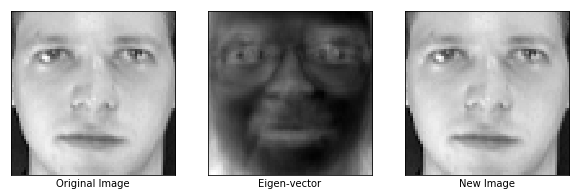

In [5]:
# Plots new images with sliders
degree_slider = widgets.IntSlider(min=0, max=30, step=1, value=0)
image_slider = widgets.IntSlider(min=0, max=399, step=1, value=0)
eig_vector_slider = widgets.IntSlider(min=1, max=4095, step=1, value=1)
interact(gen_new_image, image_num=image_slider, eig_vector=eig_vector_slider, degree=degree_slider); #374, 5, 13 is cool

# Compress and Reconstruct Image

In [6]:
# Data set compression
total_eigs = np.sum(eig_value)
cum_eig_vals = np.cumsum(eig_value[::-1])/total_eigs # First 10 eigs contain 65.63% of variation

# Keep to 10 dimensions
forward_eigs = np.flip(eig_vectors, axis=1)
new_data = np.dot(images, forward_eigs)

In [7]:
def reconstruct_old_image(image_num, num_eigs_to_keep):
    print("Keeping " + str(cum_eig_vals[num_eigs_to_keep]) + "% of the total variation.")
    reconstruct_image = np.sum(new_data[image_num, :num_eigs_to_keep]*forward_eigs[:,:num_eigs_to_keep],axis=1)
    fig, [ax1,ax2] = plt.subplots(1,2, figsize = (10,100))
    ax1.imshow(images[image_num].reshape(64,64), cmap='gray')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel('Original Image')
    ax2.imshow(reconstruct_image.reshape(64,64), cmap='gray')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xlabel('Compressed Image')
    plt.show()

The below section has two sliders. The first again selects which of the $400$ images to use. The second slider picks how many of the $4096$ principal components to keep and prints the percentage of variation being kept as a result. This produces a new compressed image.

Keeping 0.378067% of the total variation.


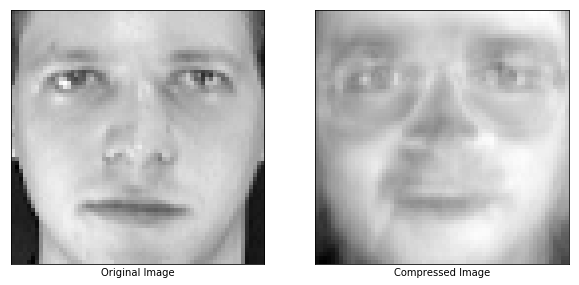

In [8]:
# Plots new images with sliders
image_slider = widgets.IntSlider(min=0, max=399, step=1, value=0)
num_eig_vector_kept_slider = widgets.IntSlider(min=1, max=4095, step=1, value=1)
interact(reconstruct_old_image, image_num=image_slider, num_eigs_to_keep=num_eig_vector_kept_slider);